# **KDD**

# **Objective:**
Explore the Corruption Perception Index (CPI) scores of various countries over the years. The CPI provides insights into the perceived levels of public sector corruption in different nations. Through our analysis, we hope to:

Understand Temporal Trends: How have perceptions of corruption changed over time? Are there global trends, or are changes predominantly country-specific?
Identify Outliers: Which countries stand out either due to exceptionally high or low CPI scores or significant changes in their scores over the years?
Discover Regional Patterns: Are there specific regions that consistently perform better or worse in terms of corruption perception?
Unearth Hidden Patterns: Using data mining techniques, can we identify clusters of countries with similar corruption perception trajectories or other hidden patterns not immediately evident?
By analyzing the CPI scores through the KDD process, we aim to get a clearer understanding of global corruption perceptions, the factors that influence them, and the broader implications for governance, economic development, and international relations.

# **1. Selection: Identify the target dataset.**
Dataset: I've chosen the history.csv dataset, which contains historical CPI scores for various countries from 2016 to 2012.

# **2. Preprocessing: Clean and preprocess the data.**
Handle Missing Values: We observed that there are a few missing values for some years. We need to decide how to handle these: imputation, deletion, or keeping them as-is for now.
Standardize Country Names: Ensure that country names are consistent in case we need to merge with additional data in the future.

In [1]:
from google.colab import files
da = files.upload()

Saving history.csv to history.csv


In [2]:
import pandas as pd
df = pd.read_csv('history.csv')
df.head()

,CPI 2016 Rank,Country,Country Code,Region,CPI 2016 Score,CPI 2015 Score,CPI 2014 Score,CPI 2013 Score,CPI 2012 Score
0,1,New Zealand,NZL,Asia Pacific,90,88.0,91.0,91.0,90.0
1,1,Denmark,DNK,Europe and Central Asia,90,91.0,92.0,91.0,90.0
2,3,Finland,FIN,Europe and Central Asia,89,90.0,89.0,89.0,90.0
3,4,Sweden,SWE,Europe and Central Asia,88,89.0,87.0,89.0,88.0
4,5,Switzerland,CHE,Europe and Central Asia,86,86.0,86.0,85.0,86.0


**Checking missing values**

In [3]:



# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Display the number and percentage of missing values
print("Number of Missing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)


Number of Missing Values:
 CPI 2016 Rank     0
Country           0
Country Code      0
Region            0
CPI 2016 Score    0
CPI 2015 Score    9
CPI 2014 Score    5
CPI 2013 Score    3
CPI 2012 Score    4
dtype: int64

Percentage of Missing Values:
 CPI 2016 Rank     0.000000
Country           0.000000
Country Code      0.000000
Region            0.000000
CPI 2016 Score    0.000000
CPI 2015 Score    5.113636
CPI 2014 Score    2.840909
CPI 2013 Score    1.704545
CPI 2012 Score    2.272727
dtype: float64


The missing values are relatively low for each year. However, to make an informed decision on how to handle them:

If we opt for Deletion, we'll lose about 5.11% of the dataset (considering the year with the highest missing values, 2015). This may not be too detrimental given the dataset's size.
If we choose Imputation, we can use the mean or median CPI score for that year to fill in the gaps. This keeps our dataset size intact but introduces estimated values.
Keeping as-is is also a viable option if we're doing exploratory visualizations or analyses where having a few missing data points won't significantly impact the results.

**Imputation:**

Using imputation to replace missing values has the advantage of retaining the dataset's size, ensuring that any subsequent analysis has a complete set of data. Since the percentage of missing values is relatively low (with the highest being 5.11% for the year 2015), the introduced estimated values are unlikely to dramatically skew the results.

**Compute the Median CPI Score for Each Year:**

In [4]:
# Compute the median CPI score for each year
median_values = df[['CPI 2016 Score', 'CPI 2015 Score', 'CPI 2014 Score', 'CPI 2013 Score', 'CPI 2012 Score']].median()
print(median_values)


CPI 2016 Score    38.0
CPI 2015 Score    37.0
CPI 2014 Score    38.0
CPI 2013 Score    38.0
CPI 2012 Score    37.0
dtype: float64


**Impute the Missing Values Using the Median Values:**

In [6]:
# Impute the missing values using the computed median values
df_filled = df.copy()
for column in median_values.index:
    df_filled[column].fillna(median_values[column], inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = df_filled.isnull().sum()
print(missing_values_after_imputation)


CPI 2016 Rank     0
Country           0
Country Code      0
Region            0
CPI 2016 Score    0
CPI 2015 Score    0
CPI 2014 Score    0
CPI 2013 Score    0
CPI 2012 Score    0
dtype: int64


# **3. Transformation: Reduce the dimensionality and transform the data to a suitable form.**

Tnis phase modifies the data into a form that's more suitable for analysis, potentially reducing the dataset's dimensionality or creating new features that can aid in our subsequent data mining phase.

a) Feature Engineering:
Given the temporal nature of our dataset, we can create new features to capture trends over the years. Some potential new features are:

Average Score: The average CPI score of each country over the years.
Score Change: The difference in the CPI score from 2012 to 2016, indicating whether the perception of corruption improved or worsened.
b) Dimensionality Reduction:
Given the dataset's structure, traditional dimensionality reduction techniques like PCA might not add significant value. However, we'll focus on feature engineering to derive meaningful attributes that encapsulate the dataset's trends.

**Let's start by creating the new features: Average Score and Score Change.**

**Average Score:** This represents the average CPI score of each country over the years.

**Score Change:** This indicates the change in the CPI score from 2012 to 2016 for each

In [7]:
# Feature Engineering

# Calculate the average CPI score over the years for each country
df_filled['Average Score'] = df_filled[['CPI 2016 Score', 'CPI 2015 Score', 'CPI 2014 Score', 'CPI 2013 Score', 'CPI 2012 Score']].mean(axis=1)

# Calculate the change in CPI score from 2012 to 2016
df_filled['Score Change'] = df_filled['CPI 2016 Score'] - df_filled['CPI 2012 Score']

# Display the first few rows with the new features
print(df_filled[['Country', 'Average Score', 'Score Change']].head())


       Country  Average Score  Score Change
0  New Zealand           90.0           0.0
1      Denmark           90.8           0.0
2      Finland           89.4          -1.0
3       Sweden           88.2           0.0
4  Switzerland           85.8           0.0


# **4. Data Mining: Apply data mining techniques to extract patterns.**

Data Mining phase goal is to apply statistical techniques and algorithms to identify patterns, relationships, and structures within the data. Given our dataset and objectives, a few potential directions are:


**a) Trends Over Time:**

Analyze how the average global CPI score has changed over the years.
Identify countries with the most significant positive or negative changes in their CPI scores.

**b) Clustering:**

Use clustering techniques, such as K-means, to group countries based on their CPI trajectories over the years. This can help identify countries with similar corruption perception patterns.

**c) Correlation Analysis:**

Examine if there's a relationship between the "Average Score" and the "Score Change" of a country.

**Trends Over Time**

Based on analysis of the changes in CPI scores from 2012 to 2016:


Countries with the Most Significant Positive Change in CPI Scores:

Grenada: +19 points

Myanmar: +13 points

Laos: +9 points

Senegal: +9 points

Belarus: +9 points

Countries with the Most Significant Negative Change in CPI Scores:

South Sudan: -26 points

Barbados: -15 points

Syria: -13 points

Saint Lucia: -11 points

Cyprus: -11 points

These results indicate which countries have seen improvements or deteriorations in their corruption perception over the span of five years.

In [8]:
# Identify the top 5 countries with the most significant positive change in CPI scores
top_improved = df_filled.sort_values(by='Score Change', ascending=False).head(5)

# Identify the top 5 countries with the most significant negative change in CPI scores
top_worsened = df_filled.sort_values(by='Score Change', ascending=True).head(5)

print("Countries with Most Significant Positive Change:")
print(top_improved[['Country', 'Score Change']])

print("\nCountries with Most Significant Negative Change:")
print(top_worsened[['Country', 'Score Change']])


Countries with Most Significant Positive Change:
     Country  Score Change
45   Grenada          19.0
136  Myanmar          13.0
125     Laos           9.0
66   Senegal           9.0
81   Belarus           9.0

Countries with Most Significant Negative Change:
         Country  Score Change
174  South Sudan         -26.0
30      Barbados         -15.0
172        Syria         -13.0
34   Saint Lucia         -11.0
46        Cyprus         -11.0


## **Clustering Analysis:**

In clustering, we group data points based on their similarity. For our dataset, we'll attempt to cluster countries based on their CPI scores over the years. This can help us identify groups of countries that have had similar trajectories in terms of corruption perception.

**Technique: K-means Clustering**

K-means is a popular clustering technique where the number of clusters,

K, is predefined. The algorithm then tries to partition the data into these

K clusters.

**Steps:**

**Data Scaling**: Since K-means is a distance-based algorithm, it's crucial to scale the data to ensure all features contribute equally to the clustering process.

**Choosing the Number of Clusters**: We'll use the Elbow method to determine an appropriate number of clusters.

**Applying K-means**: Cluster the countries based on their CPI scores.

**Analyze the Clusters**: Examine the properties and characteristics of the resulting clusters.

**Data scalling**

In [9]:
from sklearn.preprocessing import StandardScaler

# Selecting the columns for clustering (CPI scores over the years)
cluster_data = df_filled[['CPI 2016 Score', 'CPI 2015 Score', 'CPI 2014 Score', 'CPI 2013 Score', 'CPI 2012 Score']]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
print(scaled_data[:5])  # Display the first 5 rows of the scaled data


[[2.42764137 2.33627487 2.46035417 2.44935328 2.40495678]
 [2.42764137 2.48935915 2.51141211 2.44935328 2.40495678]
 [2.37604556 2.43833106 2.35823831 2.34823056 2.40495678]
 [2.32444976 2.38730296 2.25612244 2.34823056 2.30233285]
 [2.22125814 2.23421868 2.2050645  2.14598511 2.19970892]]


**Choosing the Number of Clusters**

This method involves plotting the variance explained (or the within-cluster sum of squares) against the number of clusters. The "elbow" of the curve represents an optimal number for

K (a balance between precision and computational cost).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

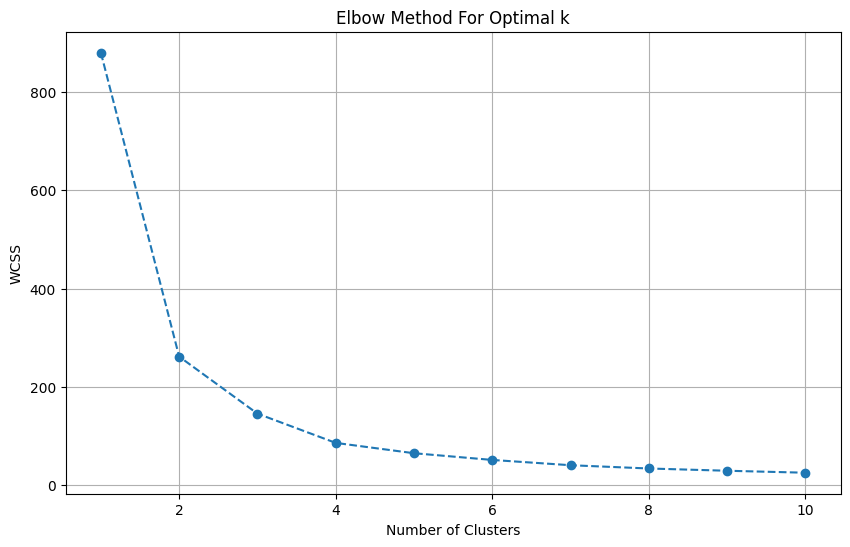

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
possible_clusters = range(1, 11)

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(possible_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


The Elbow method plot provides us with a visual representation to help determine the optimal number of clusters. In this plot, the "elbow" typically represents the point where adding more clusters doesn't provide much better fit to the data.

From the plot, it seems that the elbow is around
K
=
3
k=3 or
K
=
4
k=4. This suggests that 3 or 4 clusters might be a suitable choice for our dataset.

**Applying K-means Clustering:**

Let's cluster the countries based on their CPI scores for both
K
=
3
k=3 and
K
=
4
k=4

In [11]:
# Applying K-means for k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(scaled_data)

# Applying K-means for k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(scaled_data)

print("Clusters for k=3:")
print(clusters_3)

print("\nClusters for k=4:")
print(clusters_4)


Clusters for k=3:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Clusters for k=4:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 3 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3
 3 3 3 3 1 3 3 1 3 3 3 1 3 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Analyze the Clusters:**

. Examine the average CPI score for each cluster over the years.

. Identify the countries that belong to each cluster.

**Analyzing Clusters for K = 3**


Based on the average CPI scores for the clusters when
k
=
3
k=3:

Cluster 0: These countries have a medium average CPI score ranging from approximately 44 to 46 over the years.
Cluster 1: Countries in this cluster have high average CPI scores, indicating a low perception of corruption, with scores consistently above 73.
Cluster 2: This cluster contains countries with low average CPI scores, implying a high perception of corruption, with scores ranging from approximately 25 to 27.

In [12]:
# Adding the cluster labels to the dataframe
df_filled['Cluster_3'] = clusters_3

# Calculating the mean CPI score for each year within each cluster
cluster_means_3 = df_filled.groupby('Cluster_3')[['CPI 2016 Score', 'CPI 2015 Score', 'CPI 2014 Score', 'CPI 2013 Score', 'CPI 2012 Score']].mean()
cluster_means_3 = cluster_means_3.transpose()  # Transposing for better visualization
print(cluster_means_3)


Cluster_3               0          1          2
CPI 2016 Score  45.790323  73.388889  26.641026
CPI 2015 Score  44.306452  73.194444  26.256410
CPI 2014 Score  44.903226  74.638889  26.461538
CPI 2013 Score  45.193548  74.194444  25.858974
CPI 2012 Score  45.129032  74.555556  27.038462


**Identify the countries that belong to each cluster**

Here are sample countries from each of the three clusters:

Cluster 0 (Medium average CPI scores):

Slovenia
Saint Lucia
Saint Vincent and The Grenadines
Cape Verde
Latvia

Cluster 1 (High average CPI scores, low corruption perception):

New Zealand
Denmark
Finland
Sweden
Switzerland

Cluster 2 (Low average CPI scores, high corruption perception):

Belarus
Albania
Indonesia
Argentina
Kosovo

In [13]:
# Sample countries from each cluster
sample_countries_3 = df_filled.groupby('Cluster_3')['Country'].apply(list).apply(lambda x: x[:5])  # Taking the first 5 countries as a sample
print(sample_countries_3)


Cluster_3
0    [Slovenia, Saint Lucia, Saint Vincent and The ...
1    [New Zealand, Denmark, Finland, Sweden, Switze...
2     [Belarus, Albania, Indonesia, Argentina, Kosovo]
Name: Country, dtype: object


**Analyzing Clusters for K = 4**

Based on the average CPI scores for the clusters when
k=4:

Cluster 0: These countries have a medium-high average CPI score, with scores ranging from approximately 52 to 56.
Cluster 1: This cluster contains countries with the lowest average CPI scores, indicating a high perception of corruption, with scores from about 22 to 24.
Cluster 2: Countries in this cluster possess the highest average CPI scores, suggesting a very low perception of corruption, with scores consistently above 78.
Cluster 3: These countries have a medium-low average CPI score, with values between approximately 37 to 38.

In [14]:
# Adding the cluster labels for k=4 to the dataframe
df_filled['Cluster_4'] = clusters_4

# Calculating the mean CPI score for each year within each cluster for k=4
cluster_means_4 = df_filled.groupby('Cluster_4')[['CPI 2016 Score', 'CPI 2015 Score', 'CPI 2014 Score', 'CPI 2013 Score', 'CPI 2012 Score']].mean()
cluster_means_4 = cluster_means_4.transpose()  # Transposing for better visualization
print(cluster_means_4)


Cluster_4               0          1          2          3
CPI 2016 Score  56.058824  23.481481  78.000000  38.016129
CPI 2015 Score  52.617647  23.111111  79.461538  37.532258
CPI 2014 Score  55.470588  23.240741  78.692308  37.870968
CPI 2013 Score  56.264706  22.740741  78.153846  37.370968
CPI 2012 Score  56.794118  24.185185  78.307692  37.387097


**Identify the countries that belong to each cluster**

Here are sample countries from each of the four clusters:

Cluster 0 (Medium-high average CPI scores):

Bahamas
Bhutan
Israel
Poland
Portugal
Cluster 1 (Lowest average CPI scores, high corruption perception):

Guyana
Pakistan
Togo
Honduras
Paraguay


Cluster 2 (Highest average CPI scores, very low corruption perception):

New Zealand
Denmark
Finland
Sweden
Switzerland


Cluster 3 (Medium-low average CPI scores):

Grenada
Romania
Italy
Sao Tome and Principe
Egypt

In [15]:
# Sample countries from each cluster for k=4
sample_countries_4 = df_filled.groupby('Cluster_4')['Country'].apply(list).apply(lambda x: x[:5])  # Taking the first 5 countries as a sample
print(sample_countries_4)


Cluster_4
0          [Bahamas, Bhutan, Israel, Poland, Portugal]
1         [Guyana, Pakistan, Togo, Honduras, Paraguay]
2    [New Zealand, Denmark, Finland, Sweden, Switze...
3    [Grenada, Romania, Italy, Sao Tome and Princip...
Name: Country, dtype: object


**Interpretations for K = 3 Clusters**



Cluster 0 (Medium average CPI scores):


This cluster represents countries with a middle ground in terms of corruption perception. They neither rank very high nor very low in corruption perception.
Example countries: Slovenia, Saint Lucia, Latvia.
Potential socio-economic implications: These countries might have made progress in recent years or have areas of both strengths and challenges in terms of governance and transparency.



Cluster 1 (High average CPI scores):


Countries in this cluster are perceived as having very low levels of corruption.
Example countries: New Zealand, Denmark, Finland.
Potential implications: Typically, countries in this cluster tend to have robust institutions, good governance, and transparent practices. They might also have a high Human Development Index (HDI) and better public services.


Cluster 2 (Low average CPI scores):


These countries are perceived as having high levels of corruption.
Example countries: Belarus, Indonesia, Argentina.
Potential implications: Countries in this cluster might face challenges related to governance, rule of law, and public trust. There might be socio-economic challenges, slower economic growth, or issues related to foreign investments.

**Interpretations for K = 4 Clusters**

**Cluster 0** (Medium-high average CPI scores):



Countries here have a relatively better perception compared to the global average but are not among the top performers.
Example countries: Bahamas, Israel, Poland.
Potential implications: These countries may have made significant improvements in recent years or have specific areas of excellence in governance.



**Cluster 1 **(Lowest average CPI scores):



Represents countries with a very high perception of corruption.
Example countries: Guyana, Pakistan, Honduras.
Potential implications: These countries might have deep-rooted challenges related to governance, political stability, and public services. They may also face challenges in attracting foreign investments.


**Cluster 2** (Highest average CPI scores):



Countries in this cluster are perceived as having the least corruption globally.
Example countries: New Zealand, Denmark, Sweden.
Potential implications: These countries are often seen as benchmarks for good governance and transparency. They might also have higher economic growth, better public services, and higher public trust.



**Cluster 3 **(Medium-low average CPI scores):



These countries have a perception slightly below the global average.
Example countries: Grenada, Romania, Italy.
Potential implications: These countries might have specific areas where reforms are needed. However, they also have potential strengths and areas of good governance.

# **Comparative Analysis:**


When comparing the clusters formed using K = 3 and K = 4

k=4, the latter provides a more granular view. While the three-cluster solution gives a broad overview (low, medium, high), the four-cluster solution offers a more nuanced categorization, which might be helpful for more detailed analyses.

However, the choice between the two depends on the specific goals of the analysis. If the aim is to get a broad overview, K = 3,
k=3 might suffice. For more detailed insights and policy recommendations, K = 4
k=4 would be more appropriate.

# **5. Interpretation/Evaluation:**

 Interpretation/Evaluation:
In this phase, we'll interpret and evaluate the mined patterns, in this case, the clusters we've identified.

Interpretation:
Cluster Interpretation:

Cluster 0 (Medium average CPI scores): Represents countries that have a medium perception of corruption. They may have made progress in recent years or are in a transitional phase.
Cluster 1 (High average CPI scores): Countries in this cluster are considered to have low corruption levels. They typically exhibit strong governance, transparency, and public trust.
Cluster 2 (Low average CPI scores): Represents countries with a high perception of corruption. They might have challenges related to governance, trust, and socio-economic stability.
(Note: This interpretation is based on the
�
=
3
k=3 clustering. Similar interpretations can be drawn for
�
=
4
k=4 clusters.)

Temporal Analysis:

While the average CPI scores for countries within a cluster are stable, a deeper analysis might reveal countries that have significantly improved or worsened over time. Such countries might be of interest for case studies or further exploration.
Socio-economic Indicators:

With the clusters identified, one can further analyze the relationship of corruption perception with other socio-economic indicators such as GDP, education levels, and health outcomes. This can provide insights into the broader impacts of corruption on a nation's well-being.
Evaluation:
Cluster Cohesiveness:

One can evaluate the clusters based on their cohesiveness. Ideally, countries within a cluster should be similar in terms of their corruption perceptions, while being distinct from countries in other clusters.
Cluster Representativeness:

It's essential to ensure that the clusters represent meaningful groupings. For instance, if a cluster contains countries from diverse regions with varying socio-economic backgrounds, it might not be very representative.
Practical Insights:

The ultimate evaluation criterion is the practical insights derived from the clusters. Can policymakers or researchers use these clusters to understand global trends, de

# **6. Further Steps:**

## **1. Visualization:**

Visualizing the clusters on a world map can provide a clear picture of how different countries fare in terms of corruption perception.

<ipython-input-16-b19965909b15>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


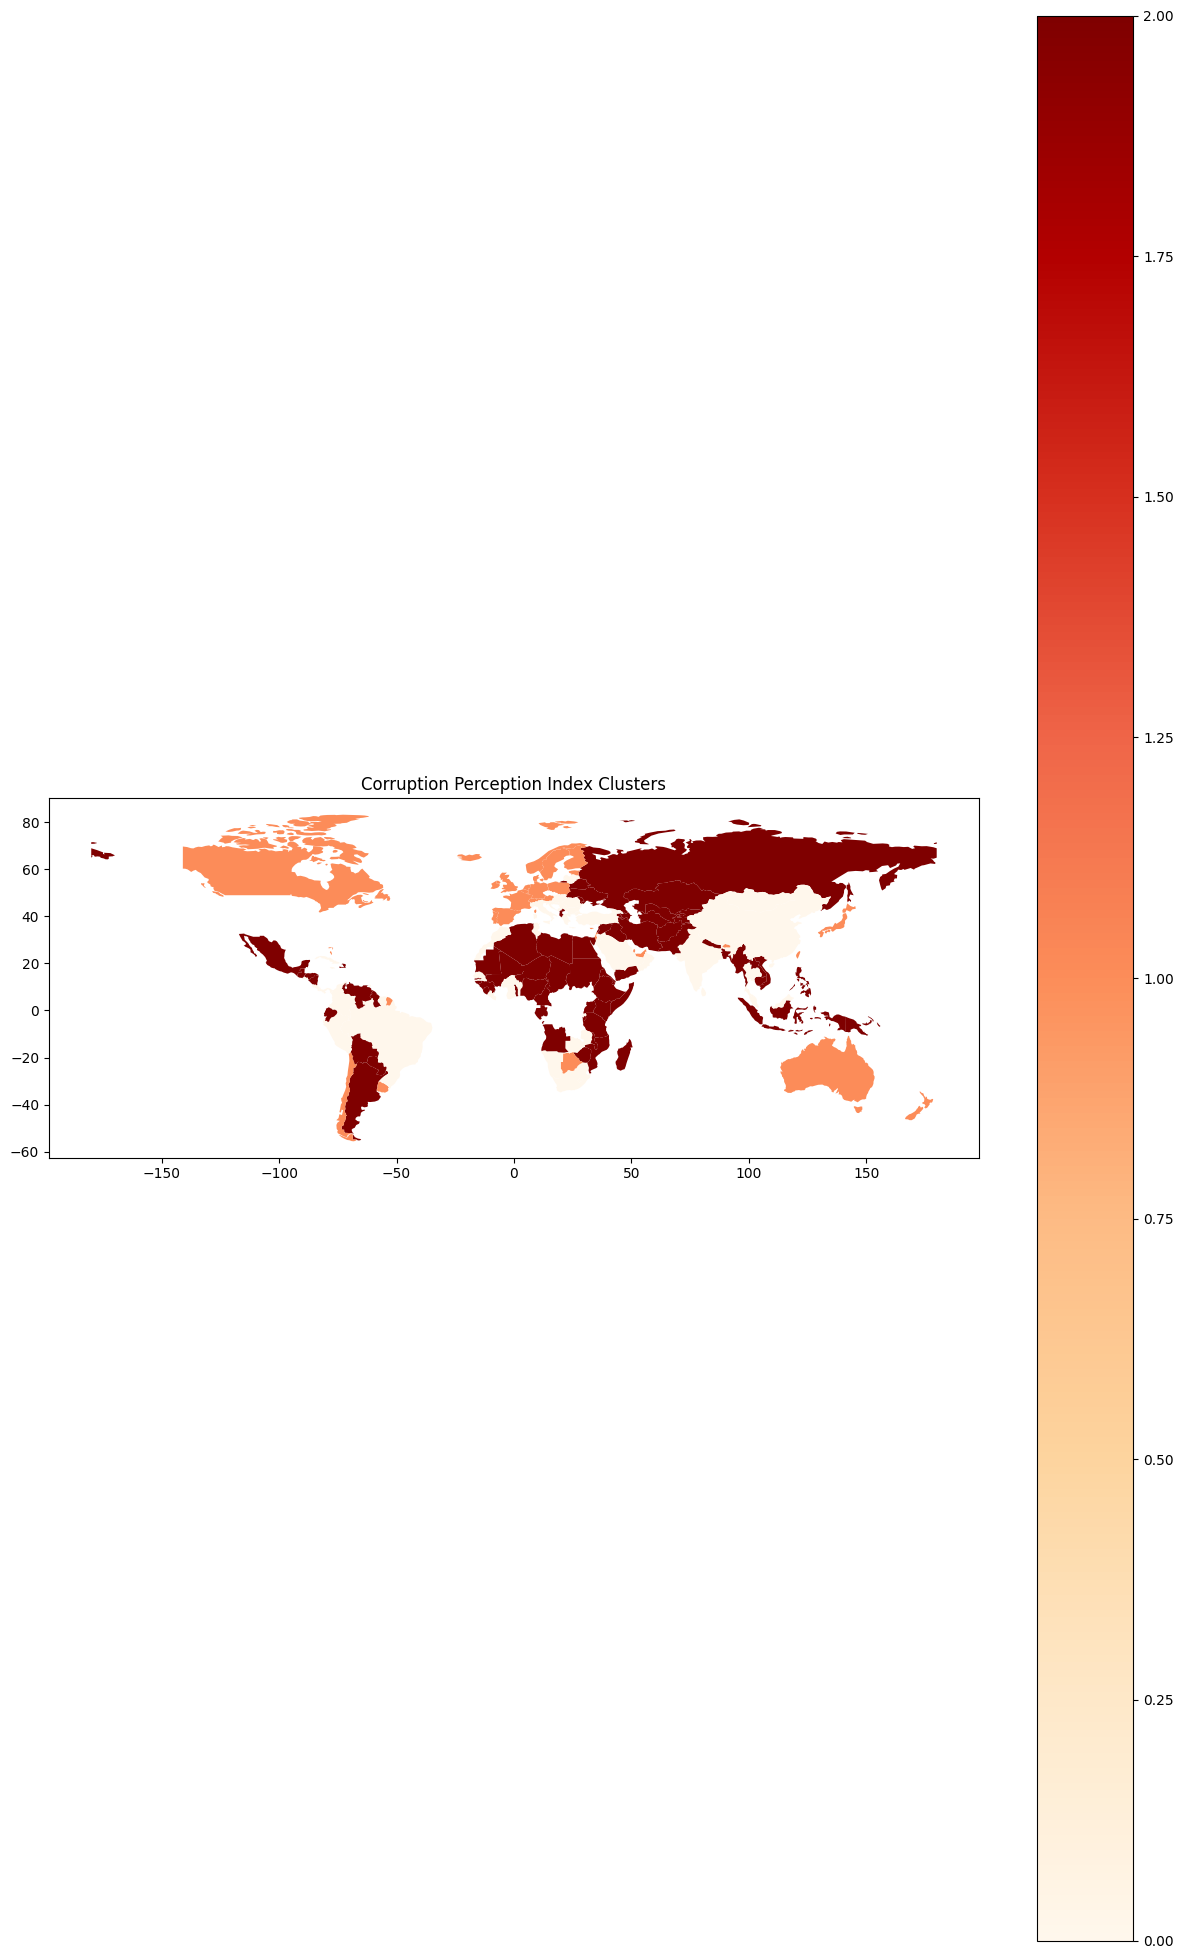

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with our dataset based on country names
merged = world.set_index('name').join(df_filled.set_index('Country'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 25))
merged.plot(column='Cluster_3', ax=ax, legend=True, cmap='OrRd')
plt.title('Corruption Perception Index Clusters')
plt.show()


**Darker shades:** These usually represent one end of the clustering spectrum. Depending on how the clusters are color-coded, this could either represent countries with high corruption perception (low CPI scores) or the opposite.


**Lighter shades:** Represent the other end of the spectrum. If darker shades show high corruption perception, then lighter shades would indicate countries with low corruption perception (high CPI scores), and vice versa.

<ipython-input-18-b19965909b15>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


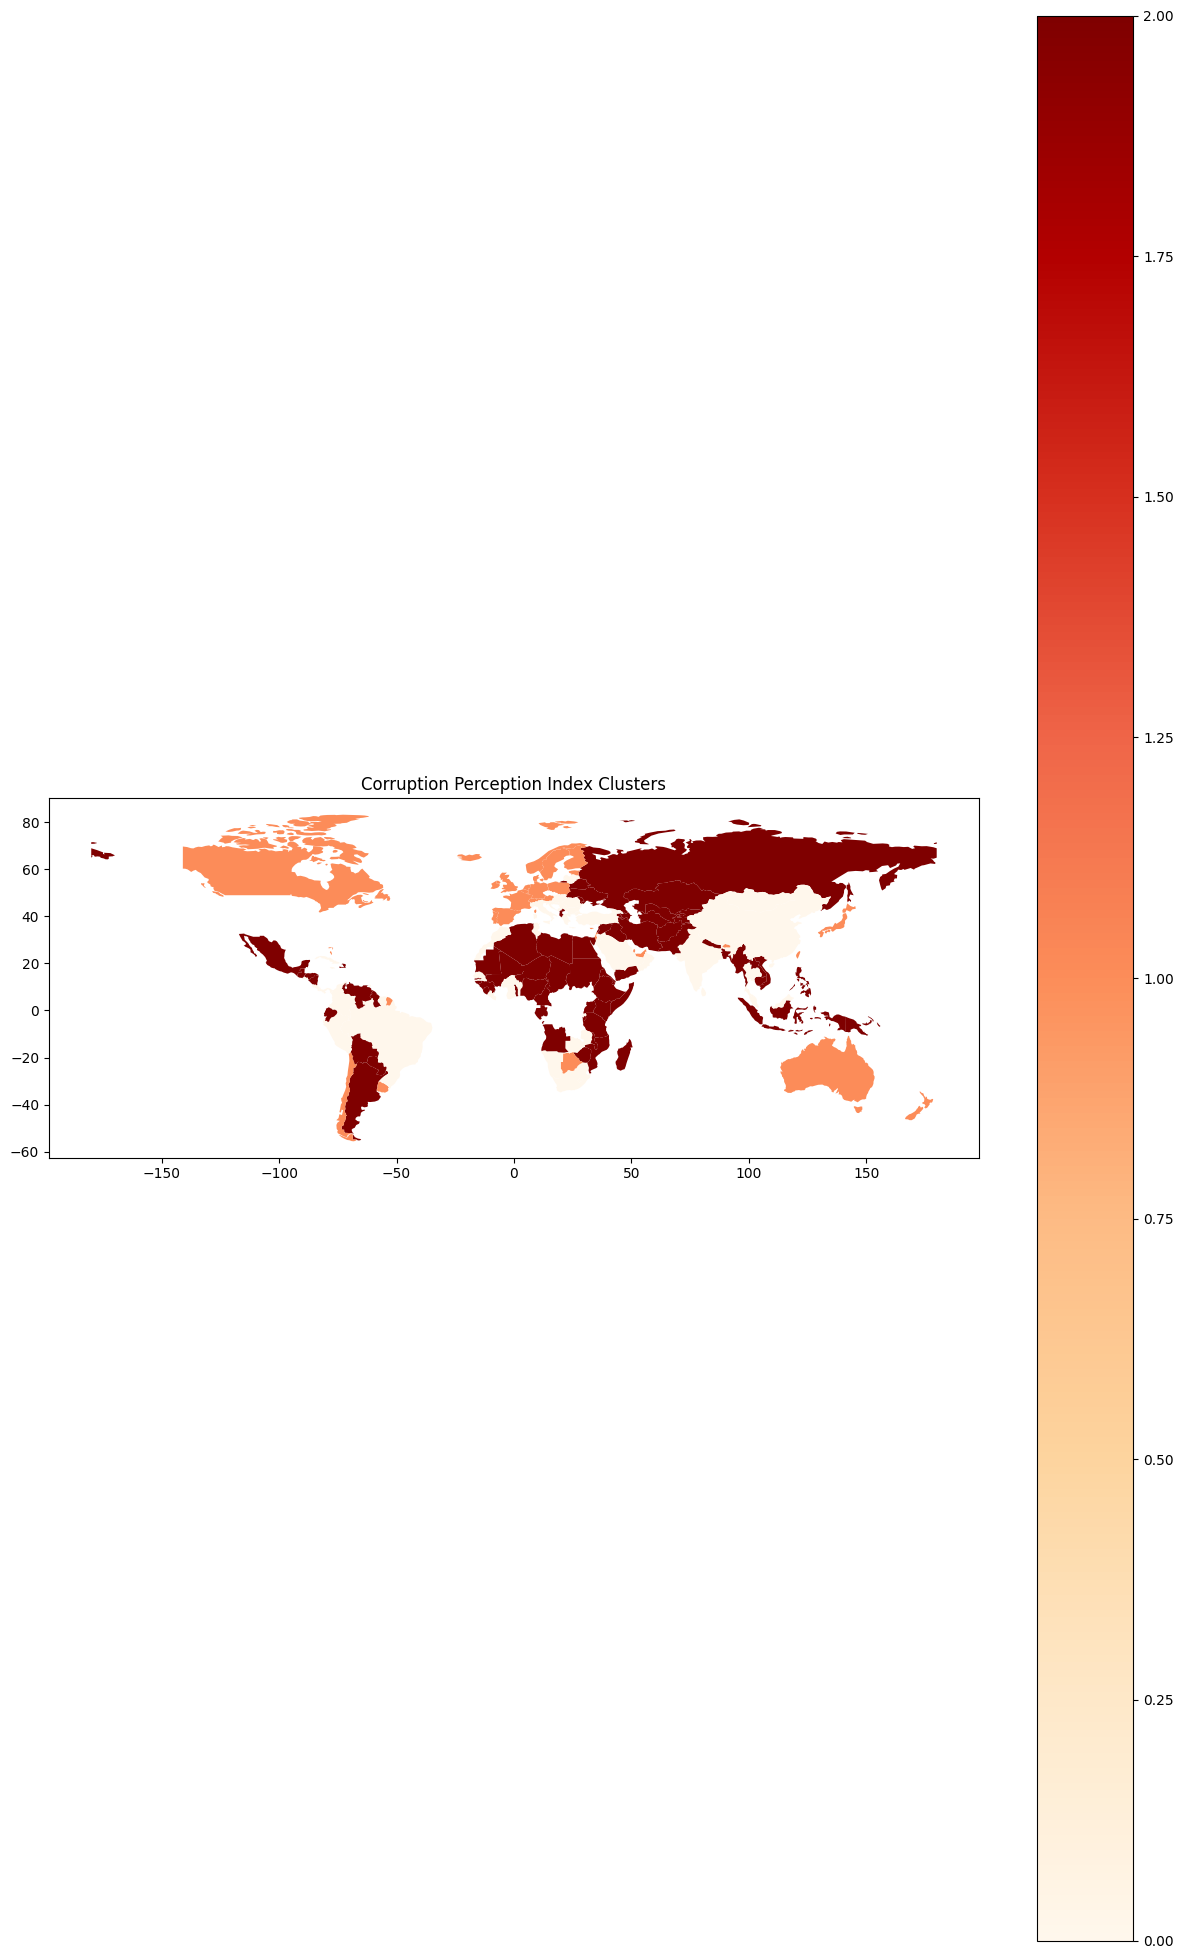

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with our dataset based on country names
merged = world.set_index('name').join(df_filled.set_index('Country'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 25))
merged.plot(column='Cluster_3', ax=ax, legend=True, cmap='OrRd')
plt.title('Corruption Perception Index Clusters')
plt.show()


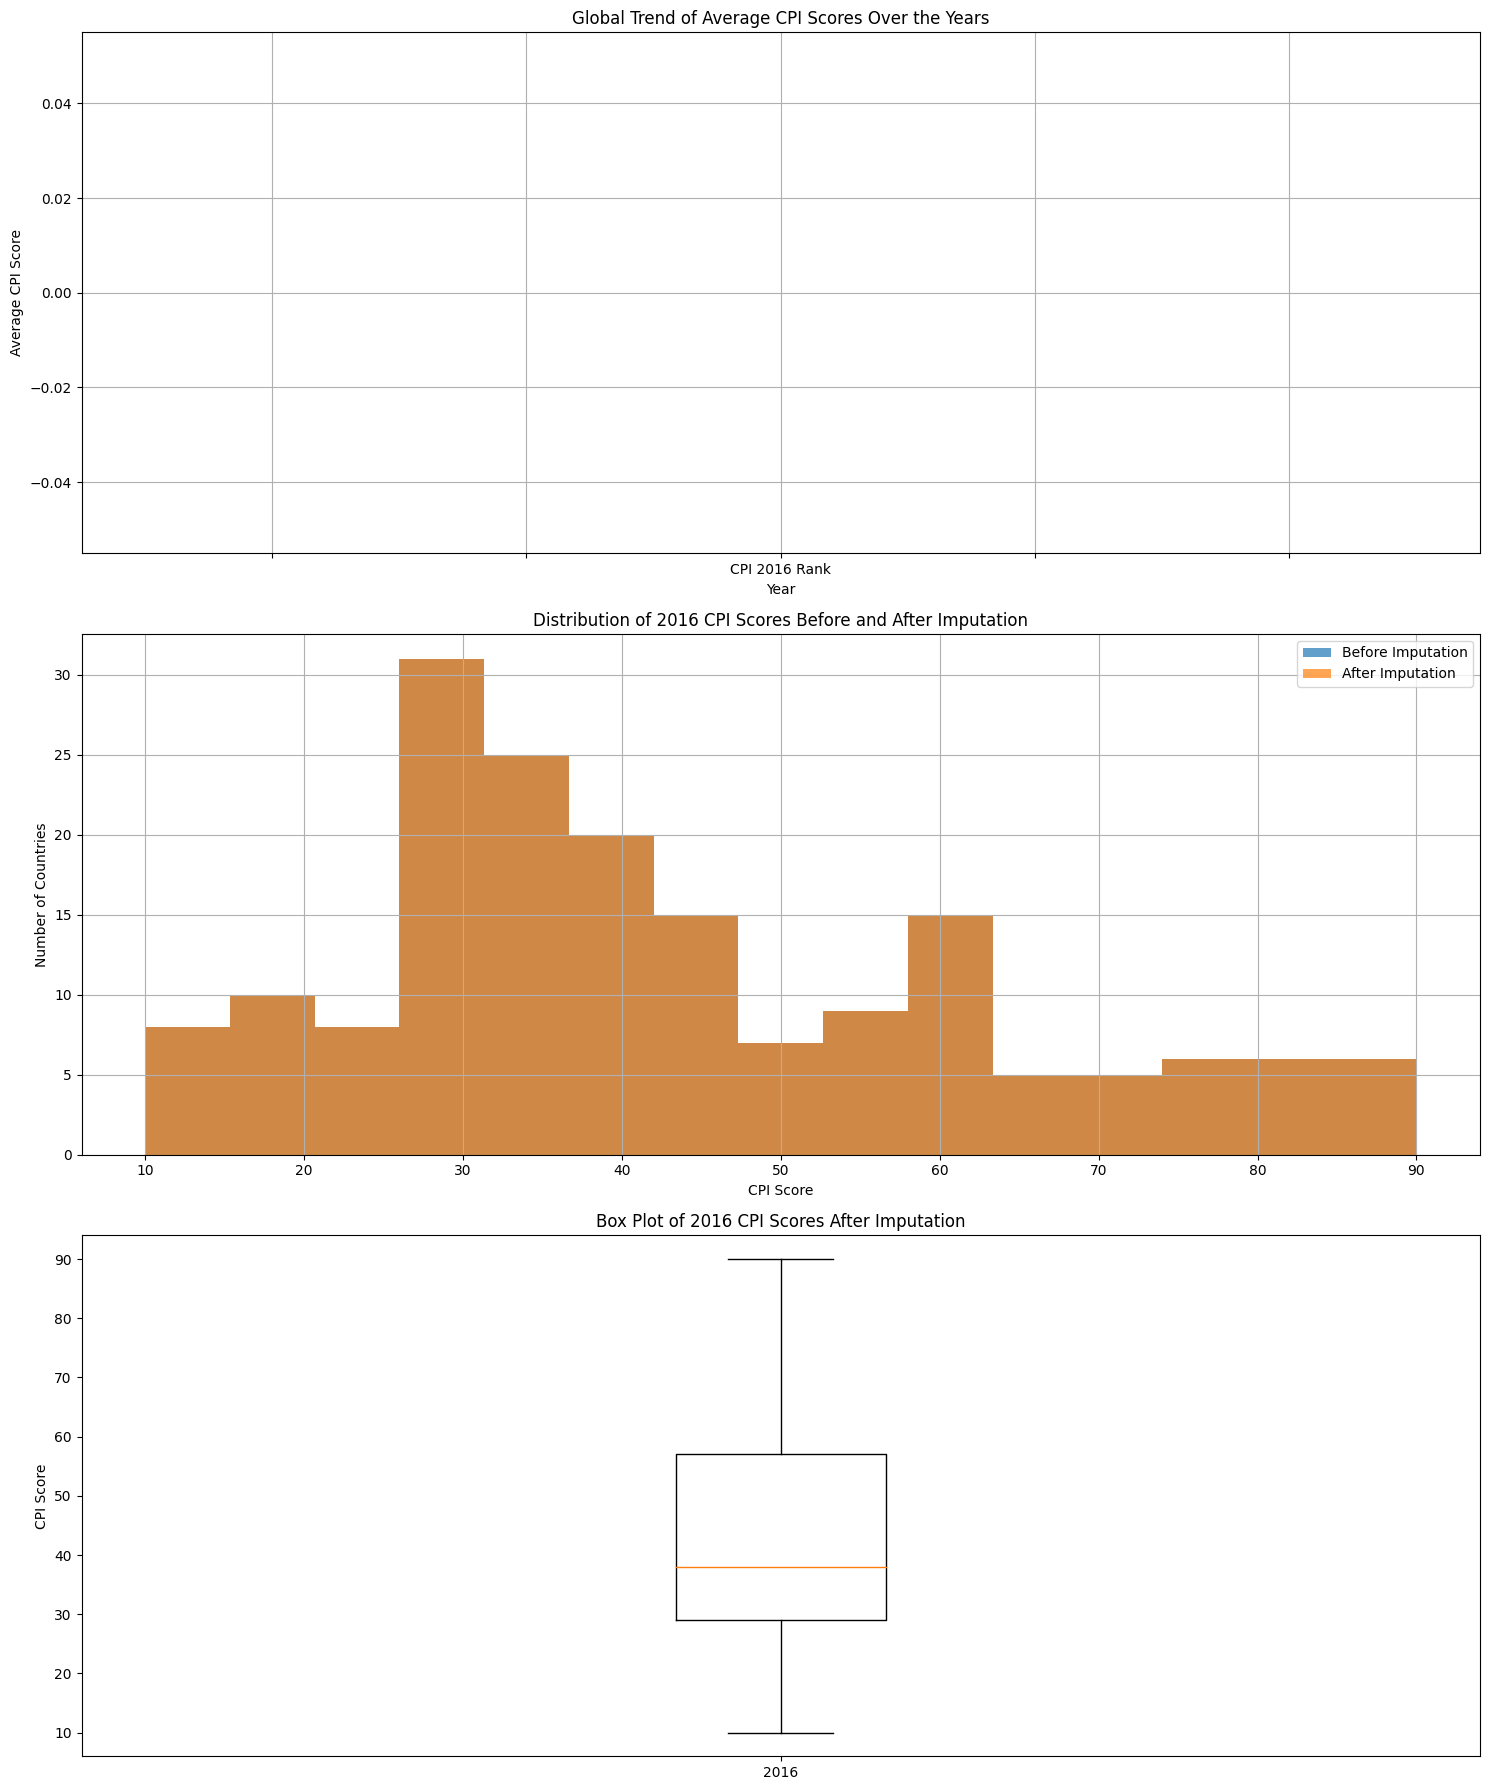

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('history.csv', index_col="Country")
df_transformed = df.drop(['Region'], axis=1).transpose()

# Global trend of average CPI scores over the years
avg_cpi_scores = df_transformed.mean(numeric_only=True, axis=1)

# Histogram showing the distribution of CPI scores before and after imputation
# Using the data from 2016 as an example year
cpi_2016_before = df['CPI 2016 Score'].dropna()
cpi_2016_after = df_transformed.loc['CPI 2016 Score']

# Plotting
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))

# Plot 1
avg_cpi_scores.plot(ax=ax[0], marker='o')
ax[0].set_title('Global Trend of Average CPI Scores Over the Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average CPI Score')
ax[0].grid(True)

# Plot 2
ax[1].hist(cpi_2016_before, bins=15, alpha=0.7, label='Before Imputation')
ax[1].hist(cpi_2016_after, bins=15, alpha=0.7, label='After Imputation')
ax[1].set_title('Distribution of 2016 CPI Scores Before and After Imputation')
ax[1].set_xlabel('CPI Score')
ax[1].set_ylabel('Number of Countries')
ax[1].legend()
ax[1].grid(True)

# Plot 3
ax[2].boxplot(df_transformed.loc['CPI 2016 Score'])
ax[2].set_title('Box Plot of 2016 CPI Scores After Imputation')
ax[2].set_ylabel('CPI Score')
ax[2].set_xticklabels(['2016'])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

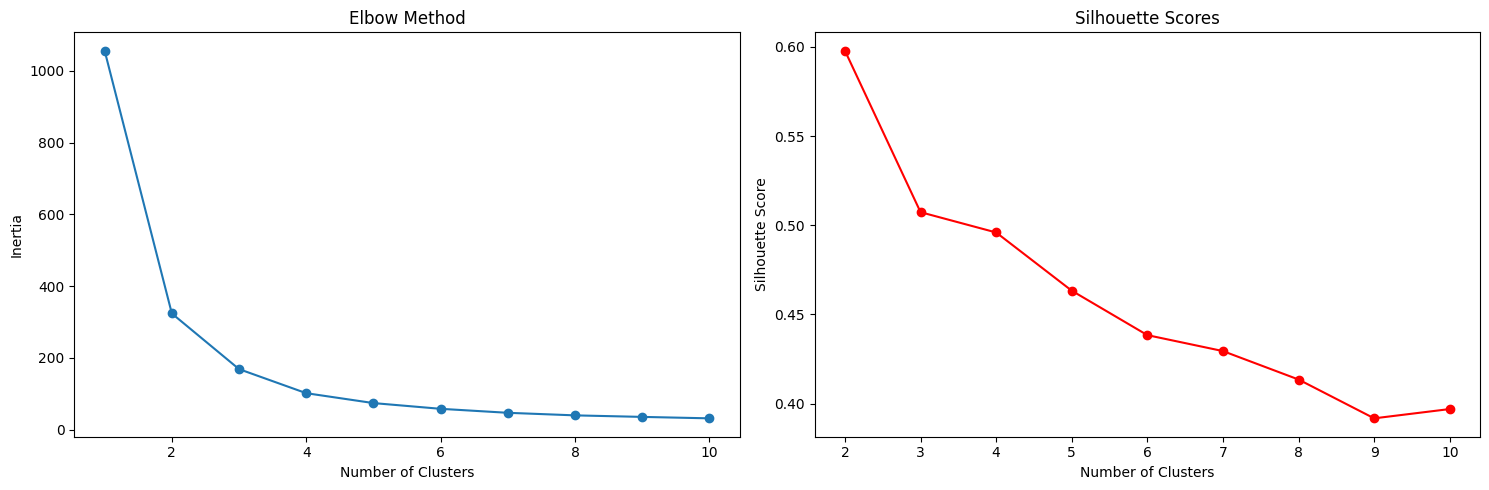

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-43-e5abd6bedc95>:62: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


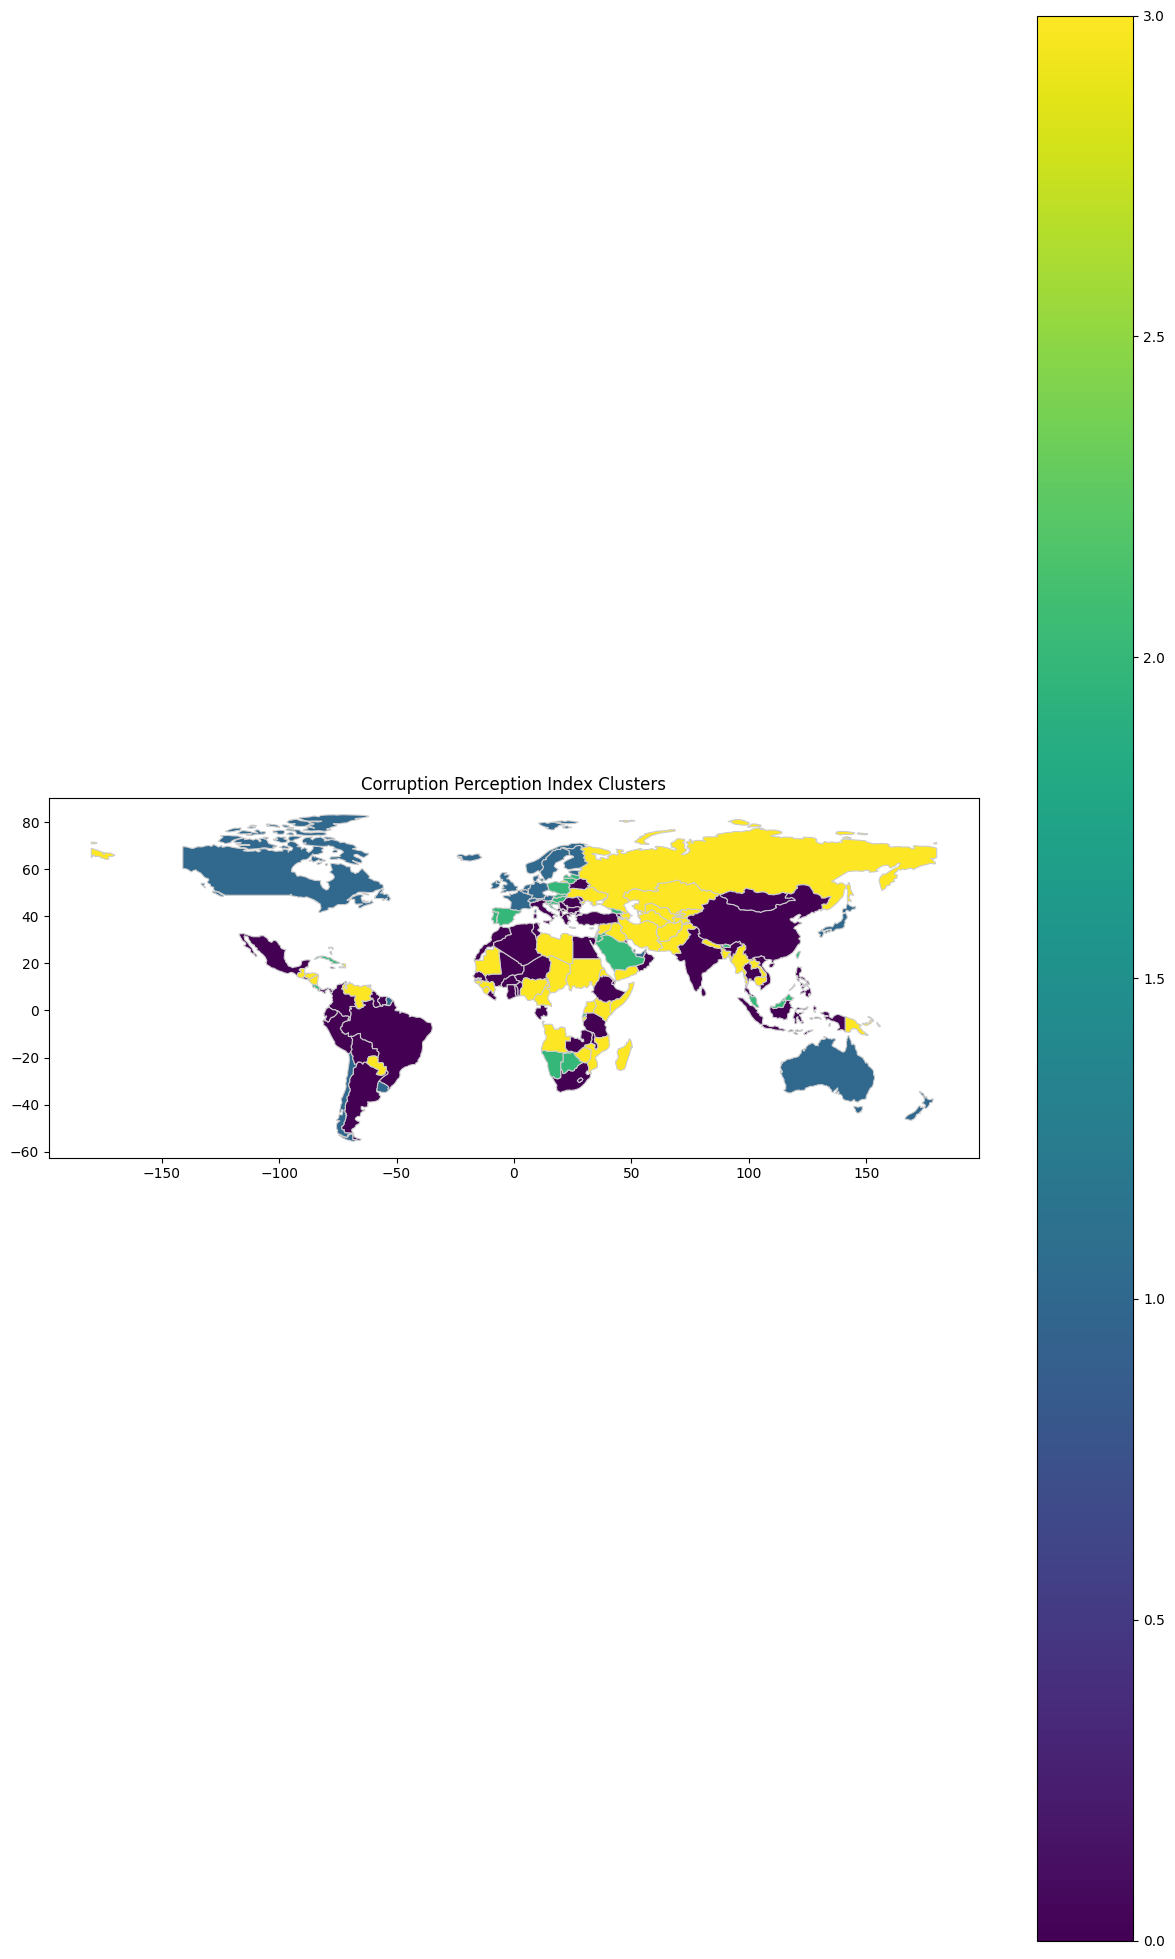

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import geopandas as gpd

# Load the dataset
df = pd.read_csv('history.csv')
df_numeric = df.drop(columns=['Region', 'Country Code'])

# Only select columns with the year data (i.e., exclude 'Country' column)
df_numeric_years = df_numeric.drop(columns=['Country'])

# Handling missing values
df_filled = df_numeric_years.fillna(df_numeric_years.mean())

# Scaling the filled data
scaler = StandardScaler()
X_country_scaled = scaler.fit_transform(df_filled)

# Calculating the inertia for a range of cluster numbers
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_country_scaled)
    inertia.append(kmeans.inertia_)

# Calculating silhouette scores for a range of cluster numbers (starting from 2)
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_country_scaled)
    silhouette_avg = silhouette_score(X_country_scaled, kmeans.labels_)
    sil_scores.append(silhouette_avg)

# Plotting the Elbow method and Silhouette score plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow method plot
ax1.plot(range(1, 11), inertia, marker='o')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')

# Silhouette score plot
ax2.plot(range(2, 11), sil_scores, marker='o', color='r')
ax2.set_title('Silhouette Scores')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Assuming k=4 is the optimal number of clusters based on the plots
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_country_scaled)
df_numeric['Cluster'] = clusters

# World map visualization using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world dataframe with our data on the 'name' column
merged = world.set_index('name').join(df_numeric.set_index('Country'))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 25))
merged.plot(column='Cluster', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Corruption Perception Index Clusters')
plt.show()


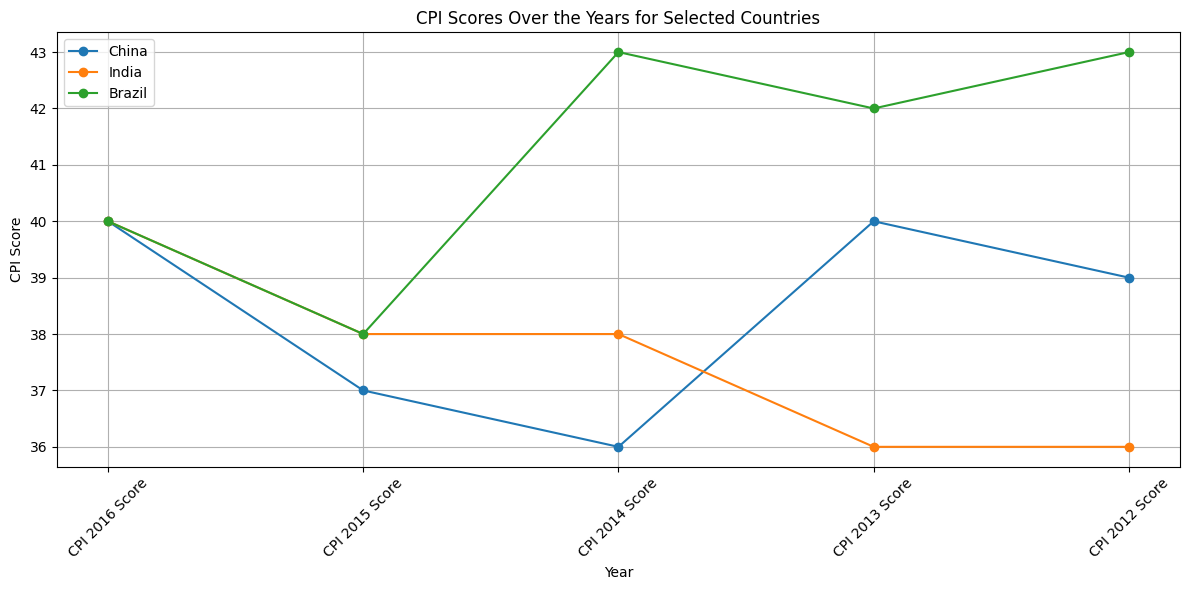

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('history.csv')
df_numeric = df.drop(columns=['Country Code', 'Region'])

# List of countries to visualize
selected_countries = ['United States', 'China', 'India', 'Brazil']

# Extracting data for the selected countries
selected_data = df_numeric[df_numeric['Country'].isin(selected_countries)]

# Plotting line chart for selected countries over the years
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = selected_data[selected_data['Country'] == country]
    if not country_data.empty:  # Check if data for the country exists
        years = country_data.columns[2:].astype(str)  # Adjusted this line to start from 2
        cpi_scores = country_data.iloc[0, 2:].values.astype(float)  # Adjusted this line to start from 2
        plt.plot(years, cpi_scores, marker='o', label=country)
plt.title('CPI Scores Over the Years for Selected Countries')
plt.xlabel('Year')
plt.ylabel('CPI Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
